# Import libraries 

In [1]:
import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv')


def warn(*args, **kwargs):    
    pass
import warnings
warnings.warn = warn


C:\Users\patel\AppData\Local\Temp\ipykernel_17192\2065862534.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


# 

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [3]:
print(df.describe())

                 id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.

In [4]:
print(df.nunique())

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

# Data Preprocessing

In [5]:

df_clean = df.dropna(subset=['price'])

# Convert 'price' from string to numeric 
df_clean['price'] = pd.to_numeric(df_clean['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

df_clean = df_clean.drop_duplicates()

print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
Index: 101811 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101811 non-null  int64  
 1   NAME                            101564 non-null  object 
 2   host id                         101811 non-null  int64  
 3   host_identity_verified          101526 non-null  object 
 4   host name                       101412 non-null  object 
 5   neighbourhood group             101783 non-null  object 
 6   neighbourhood                   101796 non-null  object 
 7   lat                             101803 non-null  float64
 8   long                            101803 non-null  float64
 9   country                         101284 non-null  object 
 10  country code                    101685 non-null  object 
 11  instant_bookable                101711 non-null  object 
 12  cancellation_policy  

In [6]:
df.shape

(102599, 26)

In [7]:
## Removing $ from service Fee column

df['service fee'] = df['service fee'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].str.strip()

In [8]:
dp= df.duplicated()
dp.value_counts()

False    102058
True        541
Name: count, dtype: int64

In [9]:
df.drop_duplicates()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


In [10]:
df.isnull().sum().sort_values()
df.isna().sum().sort_values()

id                                     0
room type                              0
host id                                0
long                                   8
lat                                    8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                        15893
house_rules     

In [11]:
df.fillna(0,inplace= True)

In [12]:
#Mapping coulmns with dtype
convert_dict = {'Construction year': int, 'price': int,
       'service fee': int, 'minimum nights': int, 'review rate number': int,
       'availability 365': int}

#Transforming dtypes
df=df.astype(convert_dict)
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                   int32
price                               int32
service fee                         int32
minimum nights                      int32
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                  int32
calculated host listings count    float64
availability 365                  

# Explanatory Data Analysis

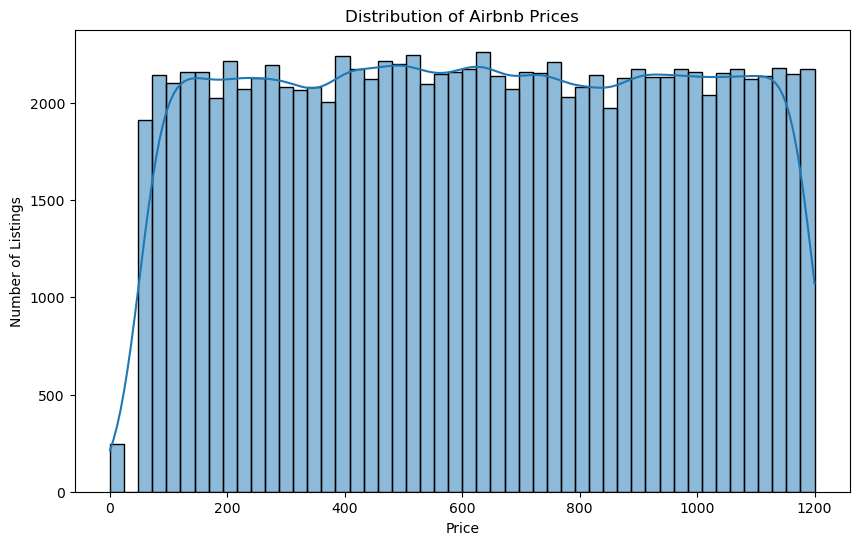

In [13]:
#how the Airbnb prices are distributed.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


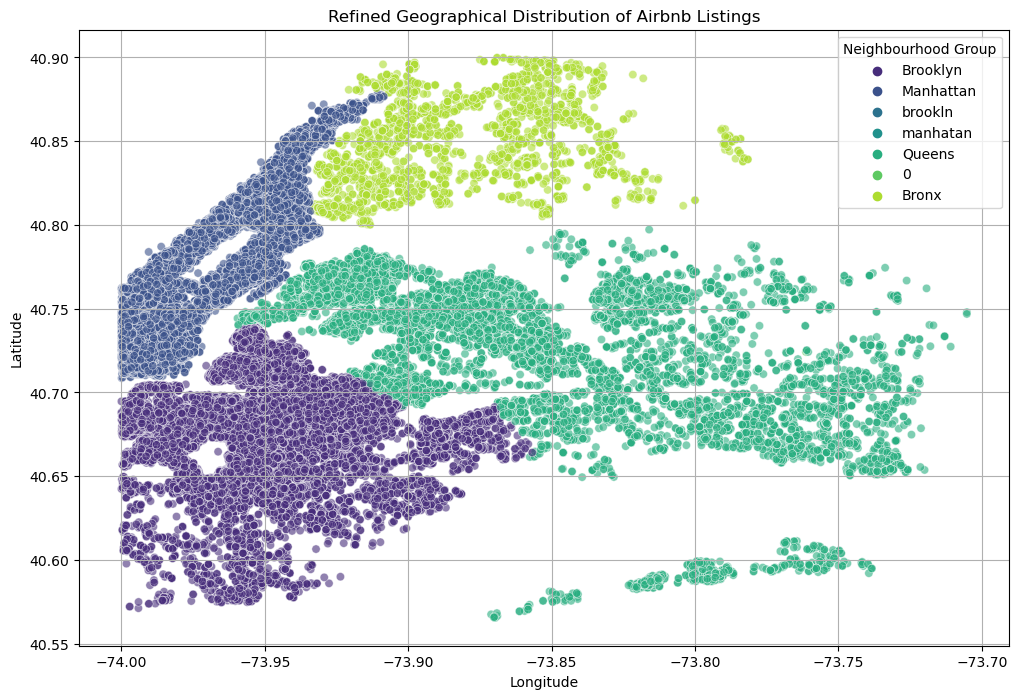

In [14]:
# Define the bounds of your region of interest
lat_min, lat_max = 40.5, 40.9  # adjust these to your region
long_min, long_max = -74, -73.7  # adjust these to your region
filtered_df = df[(df['lat'] >= lat_min) & (df['lat'] <= lat_max) & 
                 (df['long'] >= long_min) & (df['long'] <= long_max)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=filtered_df, hue='neighbourhood group', alpha=0.6, palette='viridis')
plt.title('Refined Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', loc='best')
plt.grid(True)
plt.show()


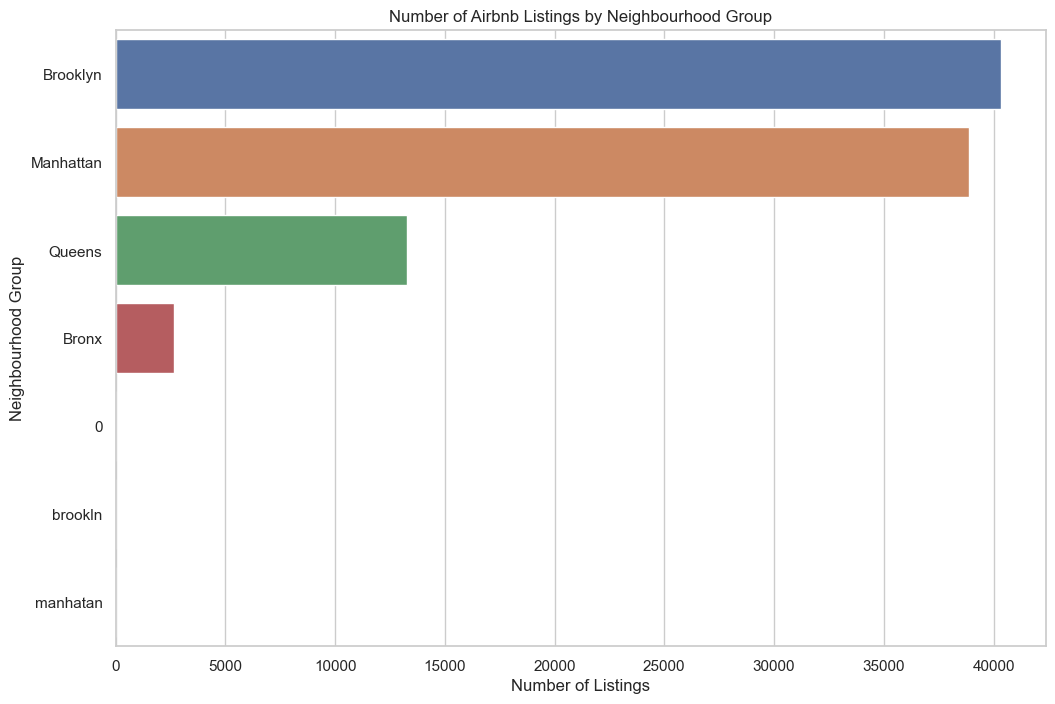

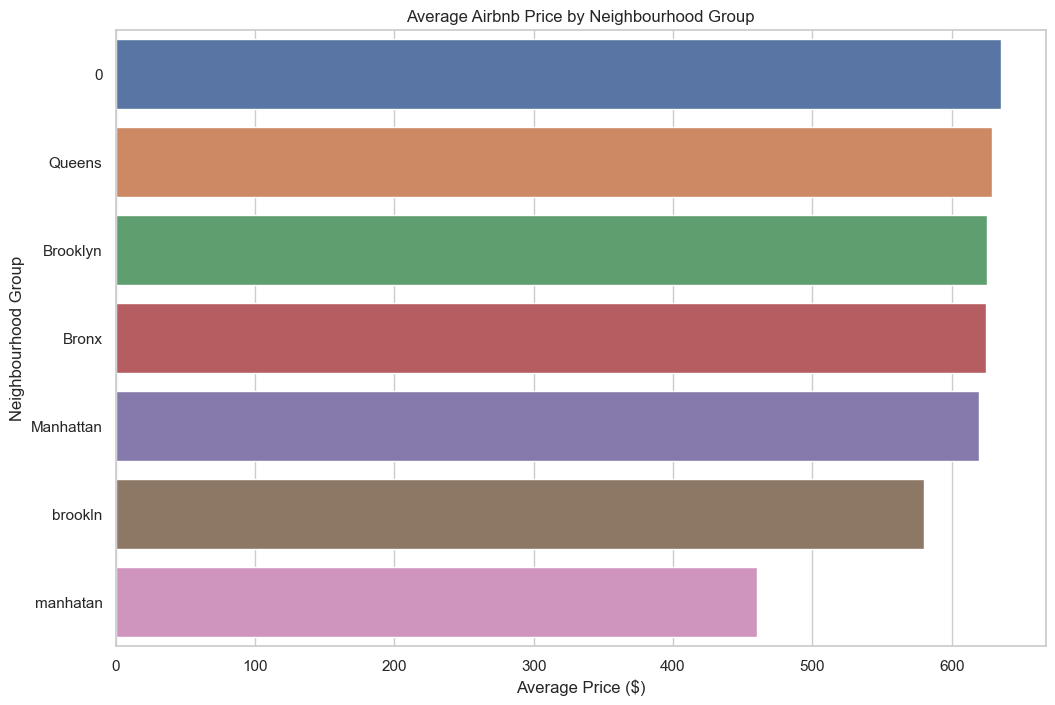

In [15]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualization 1: Number of Listings by Neighborhood
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood group', data=filtered_df, order = filtered_df['neighbourhood group'].value_counts().index)
plt.title('Number of Airbnb Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.show()

# Visualization 2: Average Price by Neighborhood
# Calculate average price per neighborhood group
avg_price_neighbourhood = filtered_df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_neighbourhood.values, y=avg_price_neighbourhood.index)
plt.title('Average Airbnb Price by Neighbourhood Group')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighbourhood Group')
plt.show()


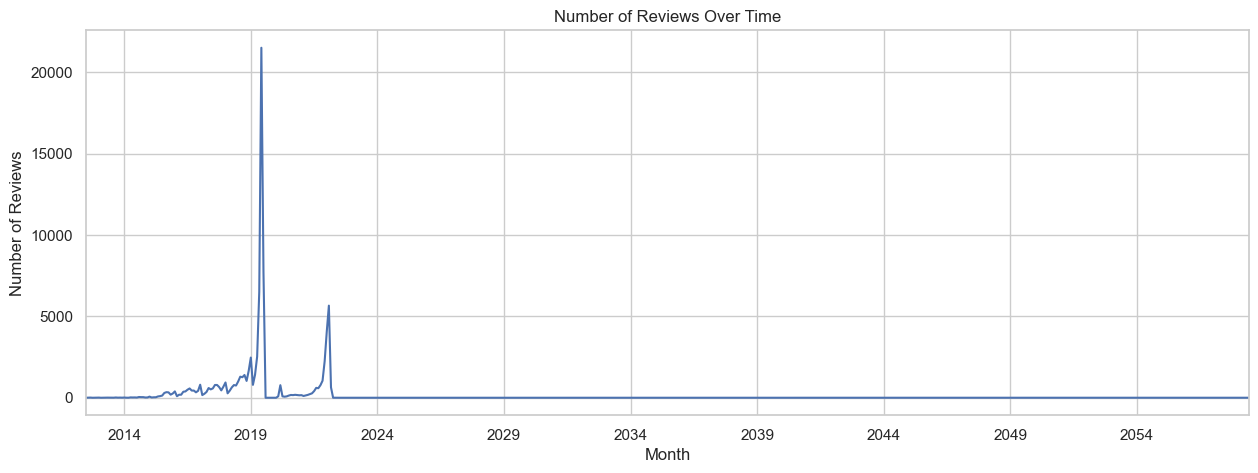

In [16]:
df['last review'] = pd.to_datetime(df['last review'], format='%m/%d/%Y', errors='coerce')
df['last review'] = pd.to_datetime(df['last review'])
df.set_index('last review', inplace=True)

# Resample the data by month and count the number of reviews
monthly_reviews = df['number of reviews'].resample('M').count()
plt.figure(figsize=(15, 5))
monthly_reviews.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


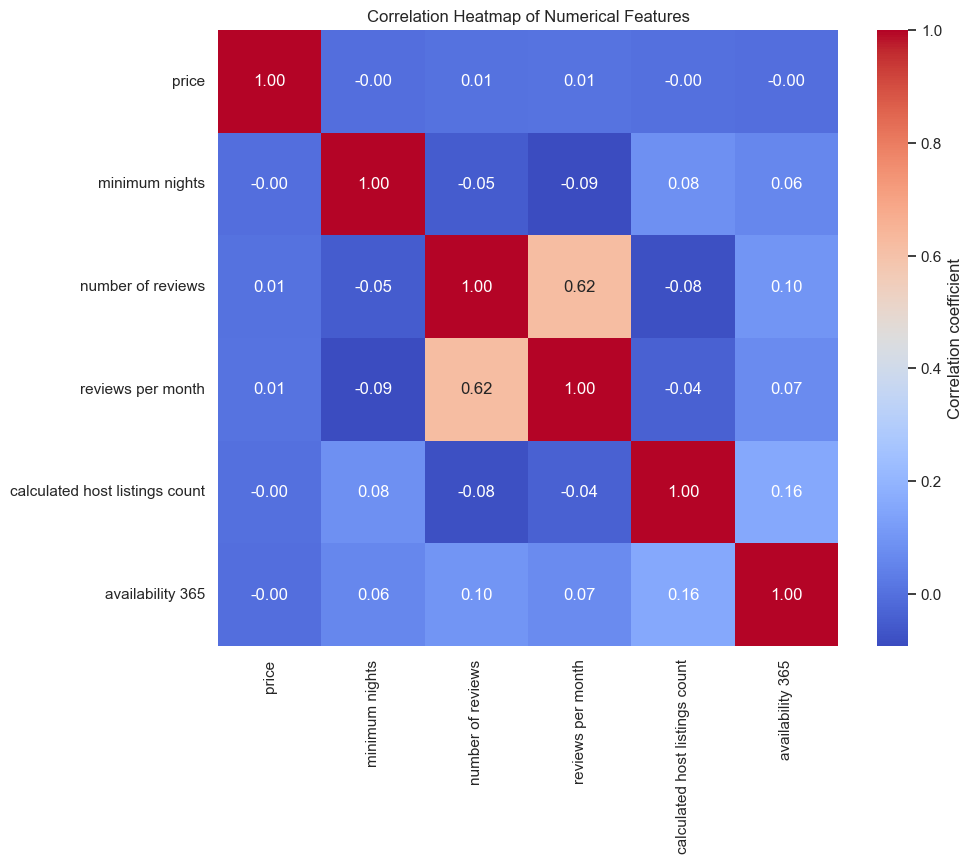

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your cleaned DataFrame and all numerical columns are correctly formatted
# Select only the numerical columns for the correlation matrix
numerical_cols = ['price', 'minimum nights', 'number of reviews', 'reviews per month', 'calculated host listings count', 'availability 365']
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [18]:
from scipy import stats

# Filter the dataset for the two groups you are interested in
group1 = df[df['neighbourhood group'] == 'Manhattan']['price']
group2 = df[df['neighbourhood group'] == 'Queens']['price']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # use equal_var=False for Welch's t-test

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Determine if the result is statistically significant
if p_value < 0.05:
    print("We reject the null hypothesis. There is a significant difference in average price between the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in average price between the two groups.")


T-statistic: -2.341455049300567, P-value: 0.01921771375824902
We reject the null hypothesis. There is a significant difference in average price between the two groups.


In [19]:
df['neighbourhood group'].nunique()

8

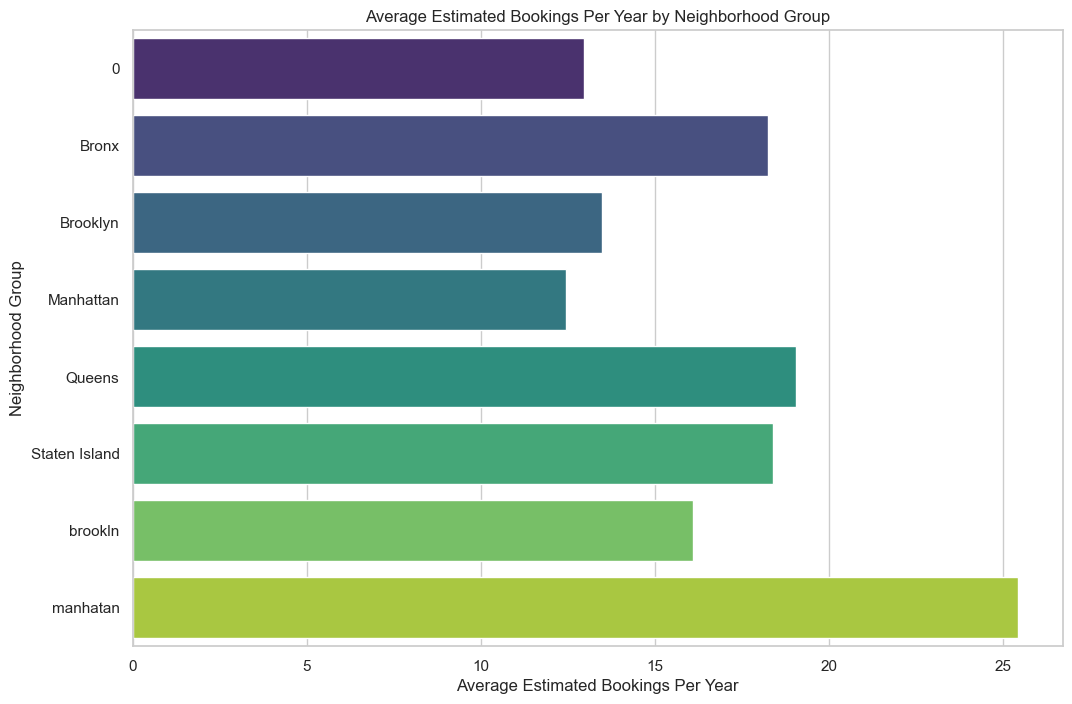

In [20]:

# Assume 'reviews_per_month' and 'neighbourhood_group' are the relevant columns
# Calculate the estimated number of bookings per year by multiplying reviews_per_month by 12
df['estimated bookings per year'] = df['reviews per month'] * 12

# Group by 'neighbourhood_group' and calculate the mean of 'estimated_bookings_per_year'
average_bookings_per_year = df.groupby('neighbourhood group')['estimated bookings per year'].mean()

average_bookings_per_year_df = average_bookings_per_year.reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='estimated bookings per year', y='neighbourhood group', data=average_bookings_per_year_df, palette='viridis')
plt.title('Average Estimated Bookings Per Year by Neighborhood Group')
plt.xlabel('Average Estimated Bookings Per Year')
plt.ylabel('Neighborhood Group')
plt.show()

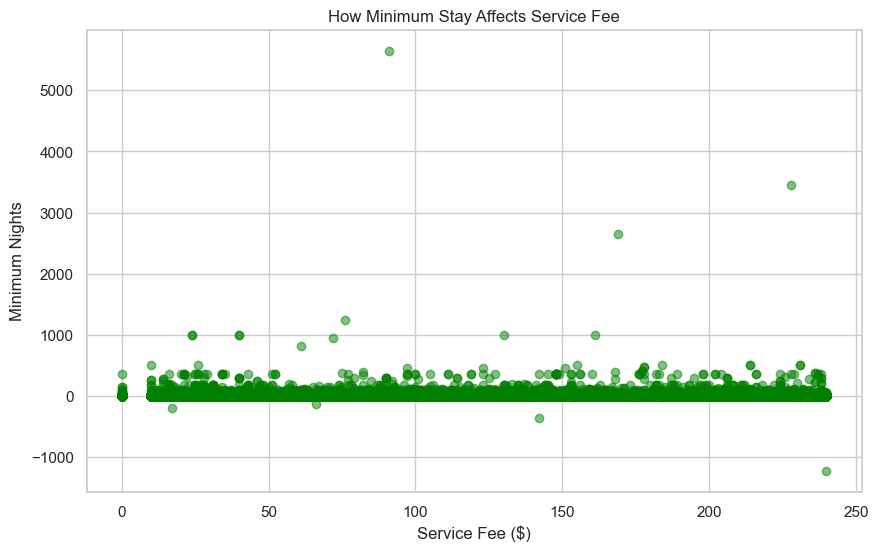

In [21]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it contains 'service fee' and 'minimum nights' columns
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.scatter(x=df['service fee'], y=df['minimum nights'], c='green', alpha=0.5)  # Added alpha for better visualization of data points density
plt.title("How Minimum Stay Affects Service Fee")
plt.xlabel("Service Fee ($)")
plt.ylabel("Minimum Nights")
plt.grid(True)  # Add grid for easier interpretation
plt.show()


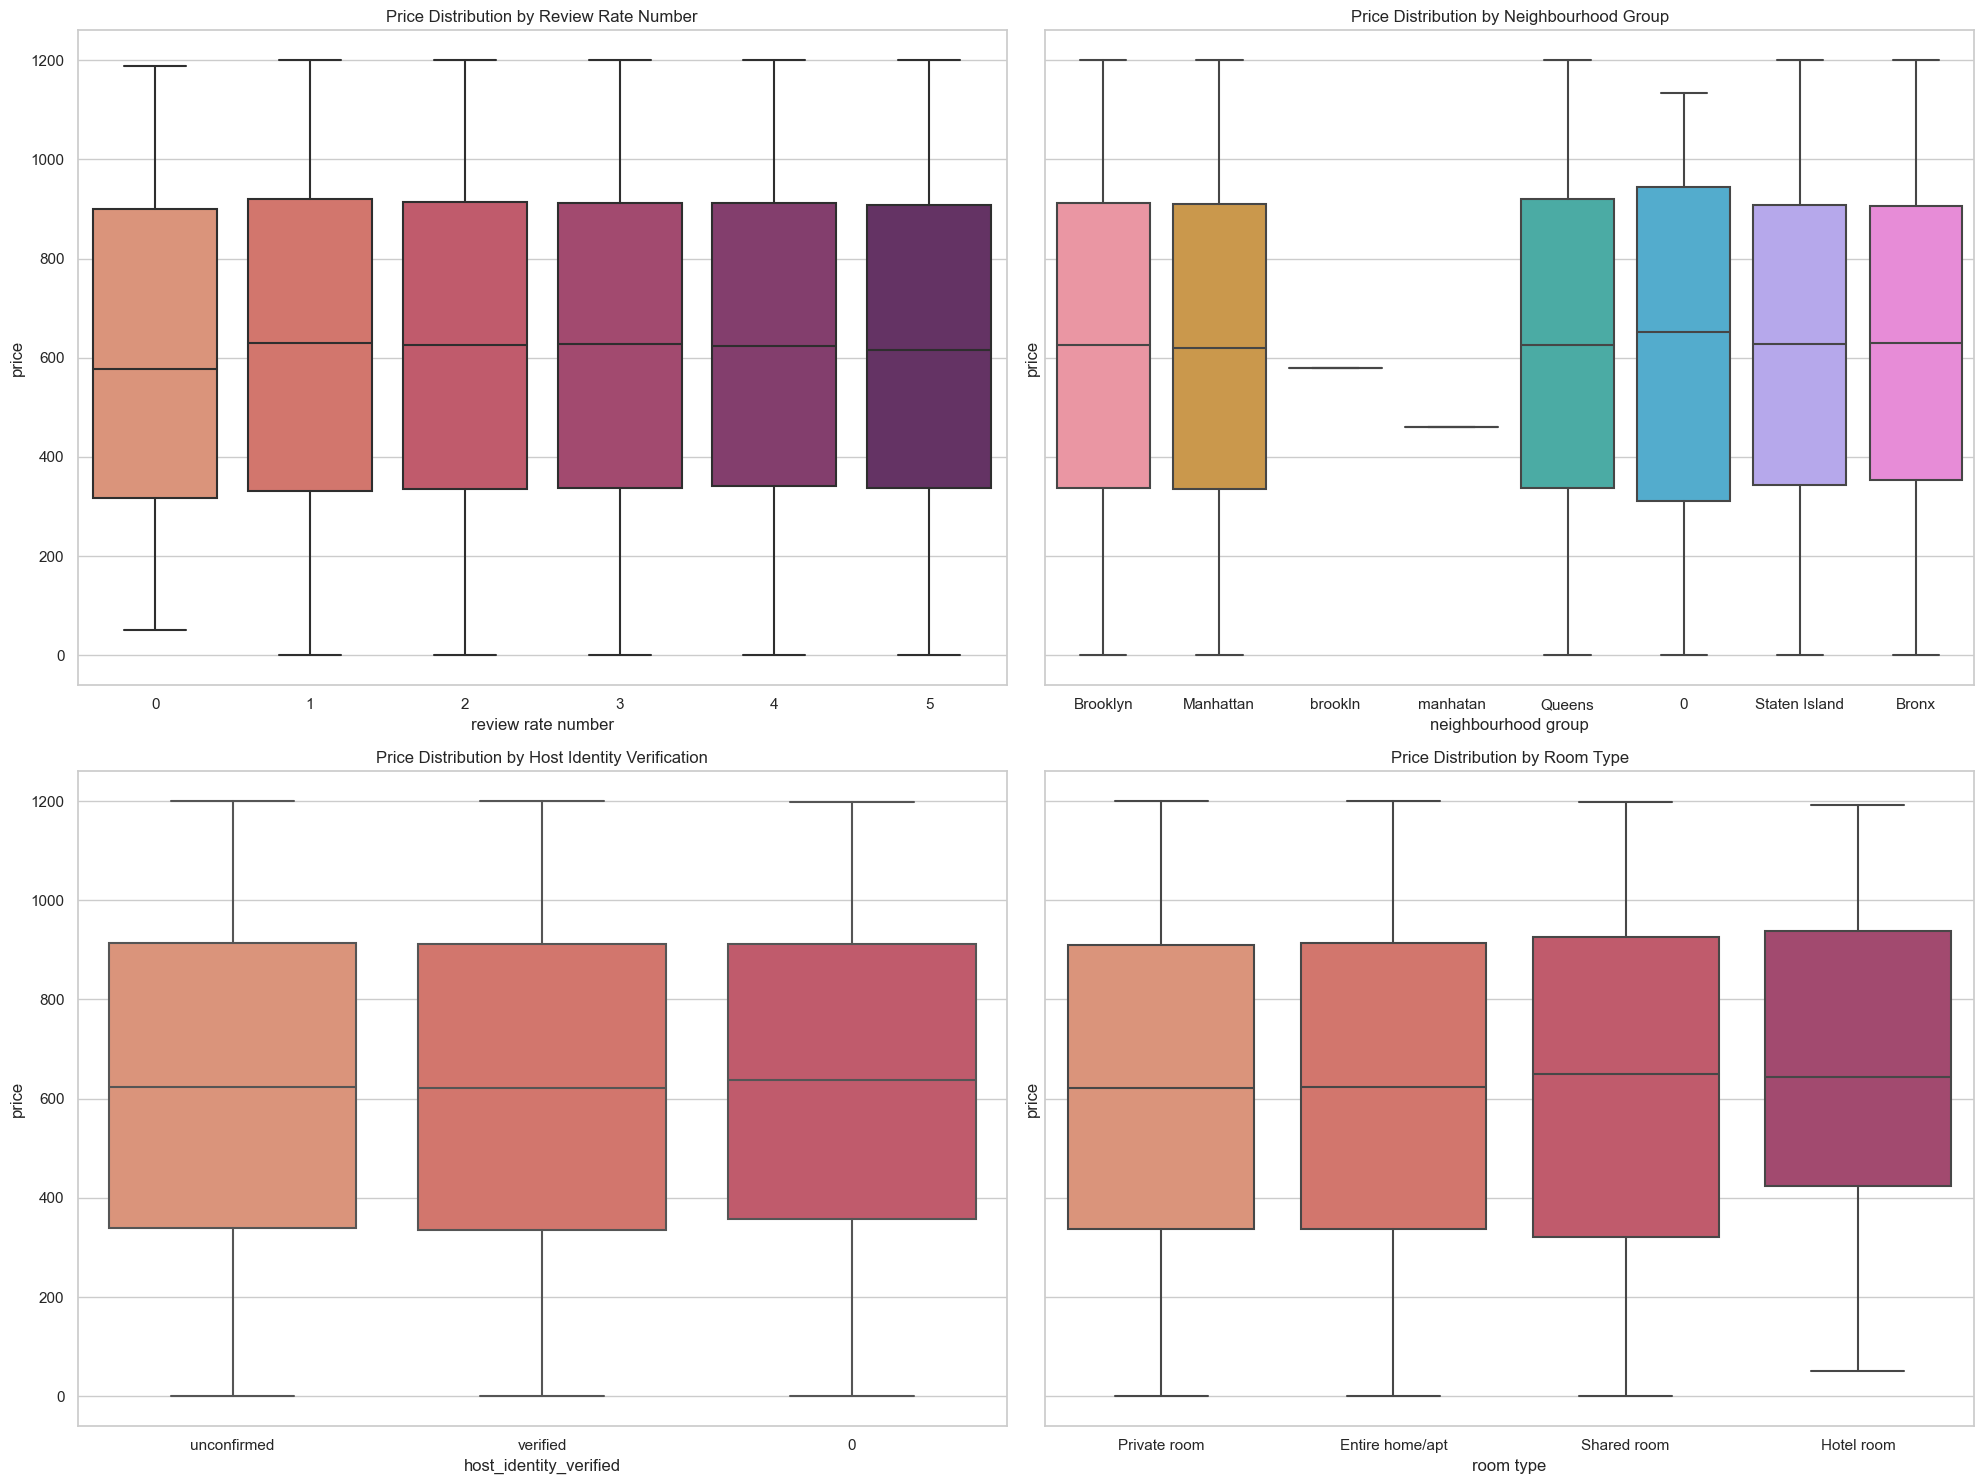

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20,15))
sns.set_palette("flare")
tmp_airbnb = df.copy()
df['review rate number'] = df['review rate number'].astype("category")

# Create boxplots
sns.boxplot(x='review rate number', y='price', data=tmp_airbnb, ax=ax[0,0])
ax[0,0].set_title('Price Distribution by Review Rate Number')

sns.boxplot(x='neighbourhood group', y='price', data=tmp_airbnb, ax=ax[0,1])
ax[0,1].set_title('Price Distribution by Neighbourhood Group')

sns.boxplot(x='host_identity_verified', y='price', data=tmp_airbnb, ax=ax[1,0])
ax[1,0].set_title('Price Distribution by Host Identity Verification')

sns.boxplot(x='room type', y='price', data=tmp_airbnb, ax=ax[1,1])
ax[1,1].set_title('Price Distribution by Room Type')

plt.tight_layout()
plt.show()


# Data Prediction

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df[['minimum nights', 'number of reviews', 'calculated host listings count']]
y = df['price']


X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 331.845831984211


In [25]:
import numpy as np

# Sample input data
X_input = np.array([[2, 15, 3],  # Example 1
                    [1, 20, 1],  # Example 2
                    [3, 10, 5]]) # Example 3


X_input_scaled = scaler.transform(X_input) 

y_pred_input = model.predict(X_input_scaled)


print("Predicted prices for the sample input data:")
for i, pred_price in enumerate(y_pred_input):
    print(f"Example {i+1}: ${pred_price:.2f}")


Predicted prices for the sample input data:
Example 1: $623.89
Example 2: $624.07
Example 3: $623.71
